# PHYS 321 Coding Lab #5: Code Testing and Bayesian Statistics with M&Ms and Radioactivity

In this Coding Lab, our goal is to learn about code testing and to sharpen our Bayesian statistics skills.

In [1]:
import numpy as np

## Bayesian inference with M&Ms

(Note: I am indebted to Prof. Gwen Eadie of the University of Toronto, who pioneered a similar M&Ms-based teaching activity while a postdoctoral scholar at the University of Washington)

<div>
<img src="images/M&Ms.jpg" width="400">
</div>

If you've consumed M&Ms before, you are probably aware that M&Ms come in a variety of different colours: red, orange, yellow, green, brown, and blue. Exactly how many of each colour one gets in a packet will depend on systematic effects (e.g., at which factory the packet was assembled) and will also have some randomness to it.

What we will do today is to answer the following question: __what fraction $b$ of M&Ms do we expect to be blue?__ The goal is to set up the problem as a Bayesian inference problem.

One approach might be to open up a packet of M&Ms, and then to just count up the number of blue M&Ms, divide by the total number of M&Ms, and declare that to be your answer. However, such an approach does not account for the fact that there is some randomness to the problem.

Recall that Bayes' theorem says that if we want to infer a parameter $b$, we can take some data $d$ and compute

\begin{equation}
p(b|d) \propto p(d|b) p(b),
\end{equation}
where $p(b|d)$ is the *posterior* distribution for the parameter $b$ given the measured data $d$, $p(d|b)$ is the *likelihood* function that tells us the probability of measuring data $d$ given the value $b$, and $p(b)$ is our *prior* belief on the distribution of $b$ before we've taken any data. In this case, our data is the number of blue M&Ms that we find in our packet. After we've collected our data, plugging $d$ into Bayes theorem might give something like this:

<div>
<img src="images/fake_posterior.png" width="400">
</div>
Your posterior distribution will not look like this (because I made the plot using fake data). But if this had in fact been the result, it would lead you to conclude that the probability of getting a blue M&M is about $b \approx 0.6$. The error bar on your estimate of $b$ would be determined by the width of this distribution.

__Question__: Let's get started on our Bayesian inference. Write down the likelihood function $p(d|b)$.

[Hint: think of $b$ as the fraction of blue M&Ms that are produced at the factory. Now imagine that you work at the factory, and your job is to fill a bag containing $n$ M&Ms. You fill the bag one M&M at a time each time drawing from what is (approximately) an infinite pool of M&Ms in the factory. What is the probability that you end up with $d$ blue M&Ms in a packet containing a total of $n$ M&Ms?]

In [2]:
## Your answer here

def likelihood (d, n, b):
    # L(d|b) = b^d * (1-b)^(n-d)
    return (b**d)*((1-b)**(n-d))

Our next step is to decide on a prior distribution. In principle, this can be anything that reflects your belief (your "best guess" prior to conducting the experiment). As an example, suppose I am trying to measure the distance $d_\textrm{gal}$ to a galaxy. I measure $d_\textrm{meas}$, with an error bar of $\sigma_m$. If my measurement errors are Gaussian-distributed, my likelihood function is

\begin{equation}
p(d_\textrm{meas} | d_\textrm{gal}) = \frac{1}{\sqrt{2 \pi \sigma_m^2}} \exp \left[- \frac{(d_\textrm{gal} - d_\textrm{meas})^2}{2 \sigma_m^2}\right].
\end{equation}

Now suppose that my prior belief on $d_\textrm{gal}$ is also Gaussian distributed, but centred about some guess $d_\textrm{guess}$:

\begin{equation}
p(d_\textrm{gal}) = \frac{1}{\sqrt{2 \pi \sigma_p^2}} \exp \left[- \frac{(d_\textrm{gal} - d_\textrm{guess})^2}{2 \sigma_p^2}\right],
\end{equation}
where $\sigma_p$ is the uncertainty in my prior knowledge.

If I multiply the likelihood by the prior to get the posterior, a little algebraic simplification reveals that

\begin{equation}
p(d_\textrm{gal} | d_\textrm{meas}) \propto \exp \left[ -\frac{(d_\textrm{gal} - \overline{d})^2}{2 \overline{\sigma}^2}\right],
\end{equation}
where $\overline{d} \equiv (d_\textrm{meas}/\sigma_m^2 + d_\textrm{guess}/\sigma_p^2)/(1/\sigma_p^2 + 1/ \sigma_m^2)$ and $\overline{\sigma} \equiv (1/\sigma_p^2 + 1/ \sigma_m^2)^{-1/2}$. Graphically, this looks like:
<div>
<img src="images/gauss_conjugate.png" width="800">
</div>
This illustrates the idea that a Bayesian analysis takes a broad, unconstrained distribution of possibilities and updates it using data.

Back to the M&Ms. What's your prior on $b$, the fraction of blue M&Ms in a packet?

__Exercise__: Write a function that generates a plot of your prior on $b$.

In [3]:
## Your code and plot goes here

from scipy.stats import beta
import matplotlib.pyplot as plt

def prior (b, n):
    x = np.linspace(0,1,100)
    # the conjugate prior of binomial distribution is beta distribution
    # alpha-1 is the number of blue M&Ms and beta-1 is the number of non-blue M&Ms
    y = beta.pdf(x, n*b+1, n*(1-b)+1)
    plt.plot(x,y,'r')
    plt.xlabel("b")
    plt.ylabel("p(b)")
    plt.title("The pdf of prior p(b)")
    plt.show()

## Your (short) discussion of what you picked goes here

We choose a beta distribution for the prior because its the conjugate prior of a binomial distribution.

For the parameters, alpha-1 is the number of blue M&Ms and beta-1 is the number of non-blue M&Ms.

__Exercise__: Write some code that will take in your measured data ($d$ blue M&Ms out of a packet containing $n$ M&Ms) and generate plots of the prior, likelihood, and posterior distributions. (Hint: Don't forget that even though we've written a lot of our probability distributions with proportionality signs so far, a proper probability distribution function needs to be normalized so that it integrates to 1!)

In [4]:
## Your code here

def three_plots (d, n):
    prior(1/6, n)

    x = np.linspace(0,1,100)
    # dx=1/100=0.01 here
    y = likelihood(d, n, x)
    plt.plot(x,y,'r')
    plt.xlabel("b")
    plt.ylabel("p(d|b)")
    plt.title("The pdf of likelihood p(d|b)")
    plt.show()

    x = np.linspace(0,1,100)
    # dx=1/100=0.01 here
    normalization_factor_posterior = np.sum((likelihood(d, n, x) * beta.pdf(x, n/6+1, n*5/6+1))*0.01)
    y = likelihood(d, n, x) * beta.pdf(x, n/6+1, n*5/6+1) / normalization_factor_posterior
    plt.plot(x,y,'r')
    plt.xlabel("b")
    plt.ylabel("p(b|d)")
    plt.title("The pdf of posterior p(b|d)")
    plt.show()

__Time to open up your packet of M&Ms!__ (Not a bad idea at this point to summon one of us to check your work so far)

__Exercise__: Open your packet of M&Ms and count the number of blue M&Ms. Plot the prior, likelihood, and posterior distributions. Feel free to eat your data when you are done!

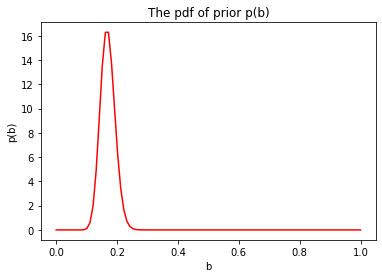

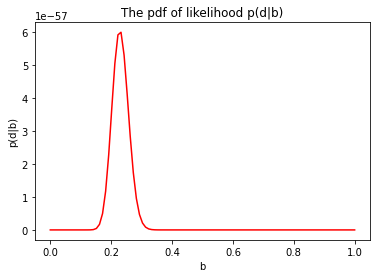

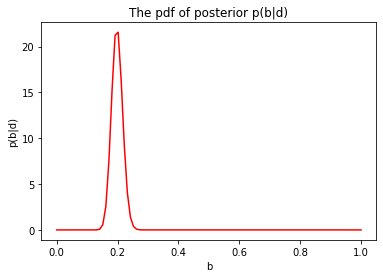

In [5]:
## Your code here

# There are 55 blue M&Ms and 186 non-blue M&Ms
three_plots (55, (55+186))

__Exercise__: Combine data with your partners. There are two ways to do this. One way is to simply combine your datasets into one big dataset and to redo your analysis. Another way to approach this is to use your posterior distribution as the prior for a second round of Bayesian updating. The posterior that comes out of that is then the prior for a third round etc. Do you get the same final posterior with the two methods? Plot the posterior that came from just your data and the posterior from everyone's data in the same figure. What happens as more and more data is added?

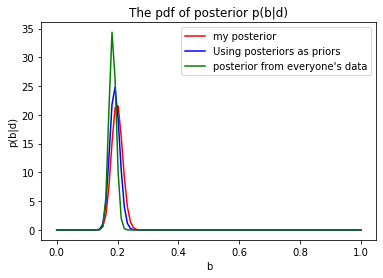

Discussion: The two methods for adding posteriors have a different output (green line vs. blue line). As more and more data is added to the data set, the distribution seems to become more narrow.


In [6]:
## Your code, plots, and discussion here

x = np.linspace(0,1,100)


#MY POSTERIOR DATA
normalization_factor_posterior = np.sum((likelihood(55, 186+55, x) * beta.pdf(x, (186+55)/6+1, (186+55)*5/6+1))*0.01)
y = likelihood(55, 186+55, x) * beta.pdf(x, (186+55)/6+1, (186+55)*5/6+1) / normalization_factor_posterior


#SUM OF ALL POSTERIOR DATAS
normalization_factor_posterior_sum = np.sum((likelihood(55+38+17, (186+55)+(38+164)+(17+91), x) * beta.pdf(x, ((186+55)+(38+164)+(17+91))/6+1, ((186+55)+(38+164)+(17+91))*5/6+1))*0.01)
ySum= likelihood(55+38+17, (186+55)+(38+164)+(17+91), x) * beta.pdf(x, ((186+55)+(38+164)+(17+91))/6+1, ((186+55)+(38+164)+(17+91))*5/6+1)/normalization_factor_posterior_sum


#USING POSTERIOR AS PRIOR FOR ALL TEAMMATES
normalization_factor2= np.sum((likelihood(38, 38+164, x) * y)*0.01)
y2=(likelihood(38, 38+164, x) * y)/normalization_factor2


normalization_factor3= np.sum((likelihood(17, 17+91, x) * y)*0.01)
y3=(likelihood(17, 17+91, x) * y)/normalization_factor3


plt.plot(x,y,'r', label='my posterior')
plt.plot(x,y3,'b', label='Using posteriors as priors')
plt.plot(x,ySum,'g', label='posterior from everyone\'s data')


plt.xlabel("b")
plt.ylabel("p(b|d)")
plt.title("The pdf of posterior p(b|d)")
plt.legend(loc='best')

plt.show()

print("Discussion: The two methods for adding posteriors have a different output (green line vs. blue line). As more and more data is added to the data set, the distribution seems to become more narrow.")

According to The Internet, there are two factories that package M&Ms. One is located in Hackettstown, New Jersey, while the other is located in Cleveland, Tennessee. It turns out that depending on where the M&Ms were packaged, the value of $b$ differs! Here are the colour distributions ([Eadie et al. 2019](https://arxiv.org/abs/1904.11006)):

<div>
<img src="images/factorydistributions.png" width="400">
</div>

__Question__: Based on your posterior distribution for $b$, which factory do you think your M&Ms came from? If you look at the serial number of your packet (it's below where they have the "best before" date), you can see which factory your packet came from: if it contains "CLV" it came from the Tennesse factory; if it contains "HKP", it came from the New Jersey factory. Is your statistical analysis consistent with the serial number? A fascinating thing that I found when buying M&Ms is that there seems to be a third factory that is now manufacturing M&Ms! If you have a packet that is from neither "CLV" nor "HKP", what can you say about the distributions? Is it close to one of the old factories? Or does it seems like a different distribution altogether?

## Your answer here

From looking at the posteriors, I would argue that mine comes from CLV since the number of blues is close to 20%. I am still not sure since my package did not have "CLV" nor "HKP". My teammates got their m&m's from CLV, and their posterior looks very close to 20% so that works. 

## Quantifying Errors

In principle, the posterior is everything we want, giving us detailed information about the distribution of possible values of a parameter. If possible, one should report posteriors. However, sometimes someone will ask you "but if you had to quote a single number and its error bars, what would it be?"

One complication with distilling our results into a single number and an error bar is that posterior distributions are often quite complicated. For example, consider the two probability distributions in the picture below:
<div>
<img src="images/multimodal.png" width="400">
</div>

If one's probability distribution is nice and Gaussian like with the black dashed line, the problem is easy. In this case, we get the same answer whether we quote the mean (average value), the median (the middle value if we rank-order all possible values from lowest to highest), or the mode (likeliest value, i.e., the $x$ value where the probability distribution peaks). The error bar $\Delta x$ is then defined as the standard deviation of the distribution, or---equivalently, for a Gaussian distribution---the width $\Delta x$ such that  $68\%$ of the probability resides within $\pm \Delta x$ of the mean.

For the red, non-Gaussian (and multimodal!) probability distribution, the mean ($\approx 4.2$), the median ($\approx 4.3$), and the mode ($\approx 3$). Which one do we quote?

There is no "right answer" here, and different people do different things. (I guess the only "right answer" is to say that if the probability distribution is complicated, one should report the full posterior to make it clear what's going on!) One option is to quote the median and then to examine the *cumulative distribution function* to help us figure out the errors. The cumulative distribution function $P(x)$ for a particular probability distribution $p(x)$ is defined as

\begin{equation}
P(x) = \int_{-\infty}^x p(x^\prime) dx^\prime.
\end{equation}
What it tells us is the probability of getting an answer smaller than $x$. For example, if $P(x=6.2) = 0.3$, it means that the $30\%$ of random draws from the distribution will give values less than $6.2$. We say that the value $6.2$ is the $30$th percentile of the distribution. The median, by definition, is the $50$th percentile of a distribution.

In the plot below, we show the cumulative distribution functions for the probability distributions shown above:
<div>
<img src="images/CDFs.png" width="400">
</div>
The orange lines show how one can use a cumulative distribution function plot to read off the $16$th percentile, $50$th percentile (i.e., the median), and the $84$th percentile. Why are we interested in these values? Because $84 - 16 = 68$, so between the orange lines, we enclose $68\%$ of the probability. We can use this to figure out "the" error bars on our result. In this case, we quote the median value and then the distance on either side to get to the $16$th and $84$th percentiles. Here, we would say $x = 4.3^{+1.2}_{-1.4}$. (Note the asymmetry of the error bars!) Another way to express our result would be to say that our $68\%$ credible region spans the range $x\approx 2.9$ to $x \approx 5.5$.

__Exercise__: Write a function that takes in your posterior distribution for $b$ from above, and returns the $n\%$ credible region (e.g., $68\%$, $95\%$ etc.)

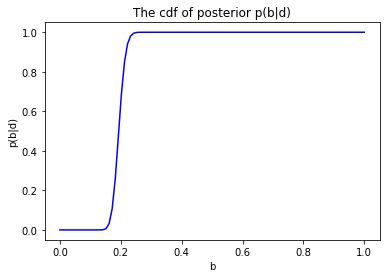

the credible region 90 % spans the range x= 0.17171717171717174  to x= 0.23232323232323235 .


In [7]:
# Your code here

from scipy.stats import norm

x = np.linspace(0,1,100)

#This part calculates the cdf from array y
i=1
for e in range(len(y)-1):
    y[i]=y[i]+y[i-1]
    i+=1
    
y=y/max(y)

#This part plots the cdf
plt.plot(x,y,'b')
plt.xlabel("b")
plt.ylabel("p(b|d)")
plt.title("The cdf of posterior p(b|d)")
plt.show()

def what_is_x_when_y_is(input, x, y):
    return x[y.searchsorted(input, 'left')]
#Got this function from https://stackoverflow.com/questions/11467649/how-do-i-find-x-given-y-or-vice-versa-in-numpy

#This is the function that answers the question
def credible_region(input,x,y):
    n=input/100
    n1=0.5-n/2
    n2=0.5+n/2
    x1= what_is_x_when_y_is(n1, x, y)
    x2= what_is_x_when_y_is(n2, x, y)
    print("the credible region",input,"% spans the range x=",x1," to x=",x2,".")

credible_region(90,x,y)

__Question__: To what level of credibility (e.g., $68\%$? $95\%$?) can you rule out the possibility that your packet of M&Ms came from a different factory to your "best guess"?

In [8]:
## Your answer here

#This is the same function as credible_region, but it does not print and has a return statement
def silent_credible_region(input,x,y):
    n=input/100
    n1=0.5-n/2
    n2=0.5+n/2
    x1= what_is_x_when_y_is(n1, x, y)
    x2= what_is_x_when_y_is(n2, x, y)
    return x2


#This piece of code will calculate at what percentile, the value x>0.25.
i=40
for e in range(61):
    p = silent_credible_region(i,x,y)
    if (p>0.25 or i==100):
        print("I rule out the possibility that my m&m came from the factory of New Jersey (b=0.25) at",i,"% ")
        break 
    i+=1

I rule out the possibility that my m&m came from the factory of New Jersey (b=0.25) at 100 % 


## A Radioactive Source
(This problem is adapted from an example from Information Theory, Inference, and Learning Alogrithms by MacKay)

Consider the experimental setup depicted below:

<div>
<img src="images/radioactivity.png" width="400">
</div>

Unstable radioactive particles are emitted from a source and decay at a distance $x$, a real number that has an exponential probability distribution with characteristic length $\lambda$, i.e., $p(x|\lambda) \propto \exp( - x / \lambda)$. Decay events can be observed only if they occur in a window extending from $x=1\,\textrm{cm}$ to $x=20\,\textrm{cm}$. Decays are observed at $x_1$, $x_2$, $\dots$, $x_N$. The values of these data points are stored in a file called ``radioactive.dat``

Our goal is to use Bayesian inference to figure out what $\lambda$ is. In other words, we would like to find the posterior distribution $p(\lambda | x_1, x_2, \dots, x_N)$. Bayes' theorem tells us that

\begin{equation}
p(\lambda | x_1, x_2, \dots, x_N) \propto p( x_1, x_2, \dots, x_N | \lambda ) p (\lambda)
\end{equation}

As with so many Bayesian inference problems, the hardest part is figuring out how to write down the likelihood function $p( x_1, x_2, \dots, x_N | \lambda )$. Since the radioactive decays are independent of one another, we can write

\begin{equation}
p( x_1, x_2, \dots, x_N | \lambda ) = p( x_1| \lambda )p( x_2| \lambda )\dots p( x_N| \lambda )
\end{equation}

__Exercise__: Write down $p(x|\lambda)$, taking care to make sure that it is a properly normalized probability distribution in $x$. (Recall that we only observe the particles if $x$ is between $1\,\textrm{cm}$ and $20\,\textrm{cm}$).

## Your answer here. This is all algebra, no coding required!

$\int^{20}_{1} k \cdot e^{-\frac{x}{\lambda}}dx= k\lambda(e^{-\frac{1}{\lambda}}-e^{-\frac{20}{\lambda}})$

$k\lambda(e^{-\frac{1}{\lambda}}-e^{-\frac{20}{\lambda}})=1$

$k=\frac{1}{\lambda(e^{-\frac{1}{\lambda}}-e^{-\frac{20}{\lambda}})}$

$p(x|\lambda)=\frac{e^{-\frac{x}{\lambda}}}{\lambda(e^{-\frac{1}{\lambda}}-e^{-\frac{20}{\lambda}})}$

__Exercise__: Assuming a uniform prior for $\lambda$, write some code to generate posterior distributions for $\lambda$. Make your code flexible enough that you can vary $N$, the number of data points that you read in from ``radioactive.dat``. Plot a series of posterior curves that show how one's knowledge of $\lambda$ improves as more and more data are taken.

(Note 1: ``lambda`` functions are [a thing in Python](https://www.w3schools.com/python/python_lambda.asp). To avoid confusion, it might be good to avoid giving $\lambda$ the variable name ``lambda`` in your code)

(Note 2: Your code may take a few minutes to run. This is normal. There are a lot of exponentials to evaluate, and exponentiating numbers is a fairly slow operation).

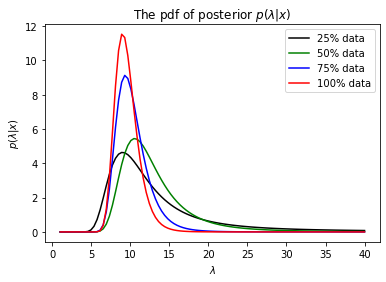

In [9]:
## Your code and plots here

def likelihood_rad(x,lam):
    # defined the likelihood above
    return np.exp(-x/lam)/(lam*(np.exp(-1/lam)-np.exp(-20/lam)))

data = np.genfromtxt('radioactive.dat',delimiter=' ')
N = len(data)

lam = np.linspace(1,40,100)
# define the L as an array of likelihood values, all equal to one initially
L = np.full(shape=len(lam), fill_value=1.)
for i in range(N):
    # multiply L by the likelihood at the i_th data point 
    L = L * likelihood_rad(data[i], lam)
    # assuming a uniform distribution
    uniform_pdf = 1/(max(lam)-min(lam))
    # normalize and calculate the current posterior
    normalization_factor_posterior = np.sum((L * uniform_pdf) * 0.01)
    y = L * uniform_pdf / normalization_factor_posterior
    if i == N // 4 - 1:
        plt.plot(lam,y,'black', label='25% data')
    if i == N // 2 - 1:
        plt.plot(lam,y,'g', label='50% data')
    if i == 3 * (N // 4) - 1:
        plt.plot(lam,y,'b', label='75% data')
    if i == N - 1:
        plt.plot(lam,y,'r', label='100% data')

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$p(\lambda|x)$")
plt.title(r"The pdf of posterior $p(\lambda|x)$")
plt.legend(loc='best')

plt.show()

__Exercise__: What is your $95\%$ credible region for $\lambda$ after 3 measurements (i.e., using $3$ values of $x$)? After $10$? After $50$? After $99$?

In [10]:
## Your code and answers here

import scipy.stats as st

# same code as right above, only now we give the 95% credible regions for lam instead of plotting the posterior curves 
lam = np.linspace(1,40,100)
L = np.full(shape=len(lam), fill_value=1.)
for i in range(N):
    L = L * likelihood_rad(data[i], lam)
    uniform_pdf = 1/(max(lam)-min(lam))
    normalization_factor_posterior = np.sum((L * uniform_pdf) * 0.01)
    y = L * uniform_pdf / normalization_factor_posterior
    if i == 2:
        interval = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
        print("The 95% credible region for lambda after 3 measurements is", end =" ")
        print(interval)
    if i == 9:
        interval = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
        print("The 95% credible region for lambda after 10 measurements is", end =" ")
        print(interval)
    if i == 49:
        interval = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
        print("The 95% credible region for lambda after 50 measurements is", end =" ")
        print(interval)
    if i == 98:
        interval = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
        print("The 95% credible region for lambda after 99 measurements is", end =" ")
        print(interval)

The 95% credible region for lambda after 3 measurements is (0.9120200146161312, 1.0879799853838692)
The 95% credible region for lambda after 10 measurements is (0.57183625905571, 1.4281637409442893)
The 95% credible region for lambda after 50 measurements is (0.6842619002892147, 1.315738099710785)
The 95% credible region for lambda after 99 measurements is (0.6162863820514257, 1.3837136179485743)


## Submitting your work

Don't forget to push a copy of your completed notebook to your Github repo for marking!